In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


from astropy.io import fits
import dill as pickle
from emcee import EnsembleSampler
import numpy as np
import os
import sys

%matplotlib inline
import matplotlib.pyplot as plt

pwd = os.getcwd()
little_things_root_dir = os.path.dirname(pwd)
sys.path.append(little_things_root_dir)

from little_things_lib.galaxy import Galaxy
from little_things_lib.nfw_mcmc_fitter import (
    EmceeParameters,
    get_mcmc_start_position, 
    generate_nwalkers_start_points, 
    lnprob)
from little_things_lib.plotting import plot_posterior_distributions, plot_walker_paths
from datetime import datetime


RAD_PER_ARCSEC = np.pi / (60*60*180)

/Applications/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [51]:
galaxy_name = 'DDO168'
DISTANCE = 4300 #kpc

data_dir = os.path.join(little_things_root_dir, 'data')

ring_parameters_file1 = os.path.join(data_dir, f'{galaxy_name}_ring_parameters_rerun1.txt')
ring_parameters_file2 = os.path.join(data_dir, f'{galaxy_name}_ring_parameters_rerun2.txt')

radii_arcsec1, vel_rotation1, vel_disp1, inclinations1, position_angles1, x_centers1, y_centers1 , v_systemics1 = \
    np.loadtxt(ring_parameters_file1, usecols=(1,2,3,4,5,-4,-3,-2)).T

radii_arcsec2, vel_rotation2, vel_disp2, inclinations2, position_angles2, x_centers2, y_centers2 , v_systemics2 = \
    np.loadtxt(ring_parameters_file2, usecols=(1,2,3,4,5,-4,-3,-2)).T

radii_kpc1 = radii_arcsec1 * RAD_PER_ARCSEC * DISTANCE
radii_kpc2 = radii_arcsec2 * RAD_PER_ARCSEC * DISTANCE


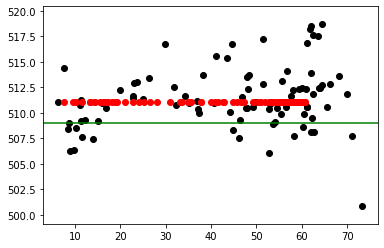

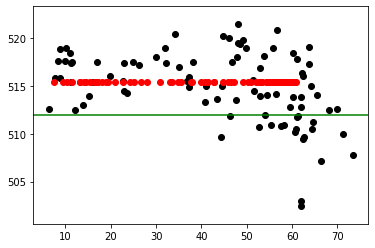

In [53]:
#plt.xlim(0,80)
#plt.ylim(480,530)
plt.axhline(y=509, color='g', linestyle='-')
plt.scatter( vel_rotation1 ,x_centers1, color='k')
plt.scatter( vel_rotation2 ,x_centers2, color='r')
plt.show()

#plt.xlim(0,80)
#plt.ylim(480,530)
plt.axhline(y=512, color='g', linestyle='-')
plt.scatter(vel_rotation1,y_centers1, color='k')
plt.scatter(vel_rotation2,y_centers2, color='r')
plt.show()

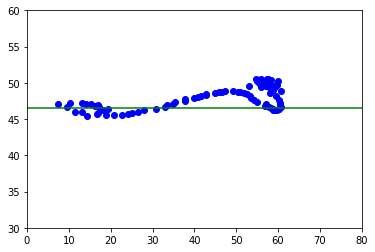

In [43]:
plt.xlim(0,80)
plt.ylim(30,60)
plt.scatter(vel_rotation, inclinations, color='b')
plt.axhline(y=46.5, color='g', linestyle='-')

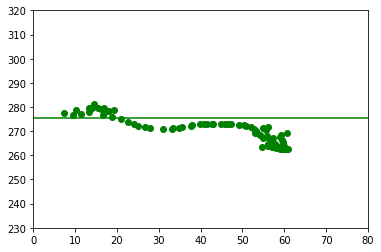

In [44]:
plt.xlim(0,80)
plt.ylim(230,320)
plt.scatter(vel_rotation,position_angles, color='g')
plt.axhline(y= 275.5, color='g', linestyle='-')

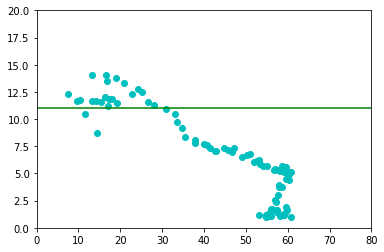

In [45]:
plt.xlim(0,80)
plt.ylim(0,20)
plt.axhline(y=11, color='g', linestyle='-')
plt.scatter(vel_rotation,vel_disp,  color='c')

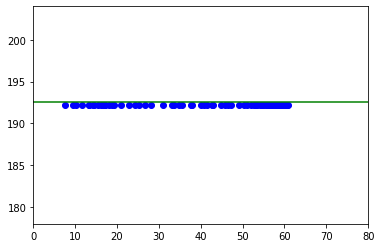

In [46]:
plt.xlim(0,80)
plt.ylim(178,204)
plt.axhline(y=192.6, color='g', linestyle='-')
plt.scatter(vel_rotation, v_systemics, color='b')

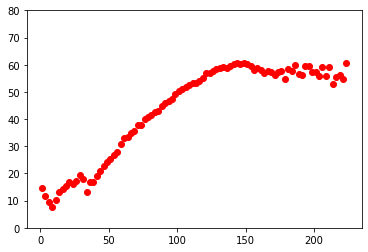

In [47]:
plt.ylim(0,80)
plt.scatter(radii_arcsec,vel_rotation, color='r')


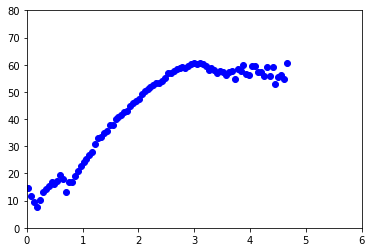

In [48]:
plt.xlim(0,6)
plt.ylim(0,80)
plt.scatter(radii_kpc, vel_rotation, color='b')
